In [1]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level


In [2]:
sf_load_df = pd.read_csv("PETR4.SA.csv")
sf_load_df.pop('High')
sf_load_df.pop('Low')
sf_load_df.pop('Close')
sf_load_df.pop('Adj Close')
sf_load_df.pop('Volume')

0       98358500
1       98679900
2       90631000
3      117400500
4       62450300
         ...    
247     75553300
248    114219500
249     87678100
250     65794000
251     51832900
Name: Volume, Length: 252, dtype: int64

In [5]:
m = NeuralProphet(
    weekly_seasonality=0,
    
    
)#entender essas funções e seus parâmetros
df_train, df_test = m.split_df(sf_load_df, freq="H", valid_p=0.01)

metrics = m.fit(df_train, freq="H", validation_df=df_test, progress="plot")
#teve uma plotagem de gráfico de logarítimos aqui que não rodou

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.032% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency B
INFO - (NP.forecaster.__handle_missing_data) - 8509 missing dates added.
INFO - (NP.forecaster.__handle_missing_data) - 5654 NaN values in column y were auto-imputed.


ValueError: More than 30 consecutive missing values encountered in column y. 2855 NA remain. Please preprocess data manually.

In [42]:
metrics.tail(1)
#quanto maior o MAE mais errado é o gráfico

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
327,0.004917,1.059015,1.318055,0.0,0.025743,3.050139,3.083629


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency B


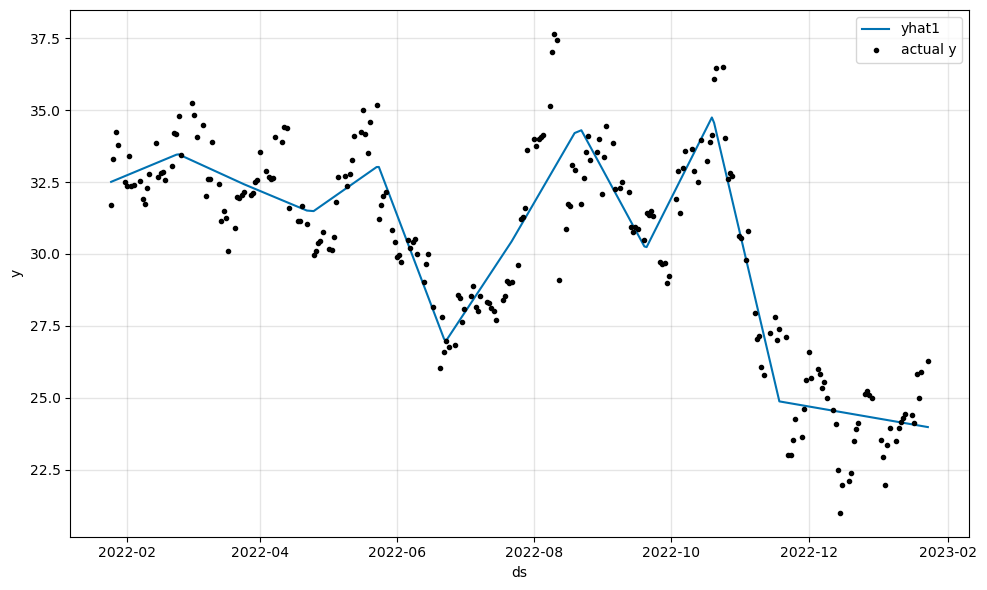

In [43]:
forecast = m.predict(df_train)
fig = m.plot(forecast)
#falta criar um gráfico de um mês no futuro

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 50.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 50.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.


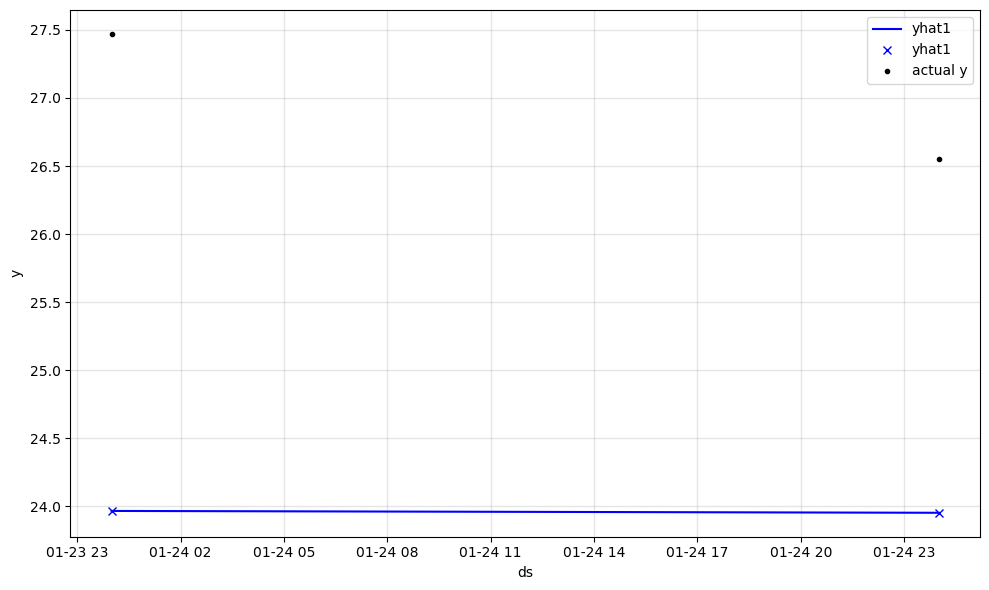

In [47]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast[-7 * 40 :])

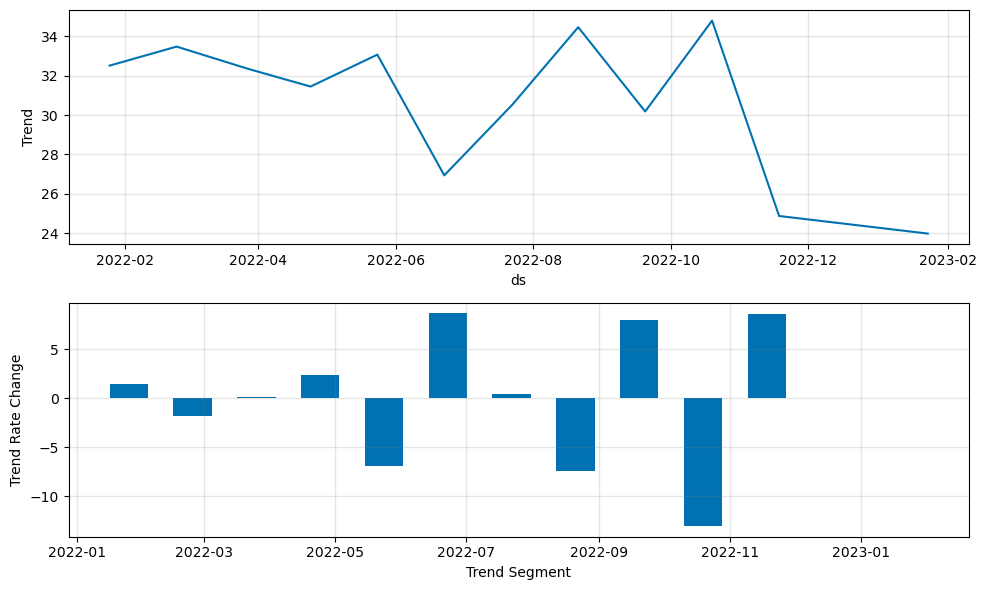

In [45]:
fig_param = m.plot_parameters()

In [46]:
future = m.make_future_dataframe(sf_load_df, periods=24, n_historic_predictions=len(sf_load_df))
forecast = m.predict(future)
#faltou plotar o futuro

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.032% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency B
WARNING - (py.warnings._showwarnmsg) - c:\Users\home\anaconda3\lib\site-packages\neuralprophet\forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 87.681% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 87.681% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency B
WARNING - (py.warnings._showwarnmsg) - c:\Users\home\anaconda3\lib\site-packages\neuralprophet\forecaster.py:1406: FutureWarning: The frame.appe